In [38]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import pyproj
import seaborn as sns


from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

Exploring relevant spatial data for use in analysis.

Comparing two shapefiles to see which might be best to represent Leeds.

In [39]:
#Importing datasets for comparison
leeds_counties_unitary = gpd.read_file('Data/Boundaries/Counties_and_Unitary_Authorities_(December_2020)_UK_BFC.shp')
LA_district = gpd.read_file("Data/Boundaries/Local_Authority_Districts_(December_2020)_UK_BFC.shp")

Let's look at the counties and unitary authorities data

In [40]:
leeds_counties_unitary.head()

,OBJECTID,CTYUA20CD,CTYUA20NM,CTYUA20NMW,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry
0,91,E08000035,Leeds,None,432528,436384,-1.50736,53.82273,5.517065e+08,161521.90936,"POLYGON ((443381.702 450063.500, 443370.398 45..."


'...and the columns'

In [41]:
leeds_counties_unitary.columns

Index(['OBJECTID', 'CTYUA20CD', 'CTYUA20NM', 'CTYUA20NMW', 'BNG_E', 'BNG_N',
       'LONG', 'LAT', 'Shape__Are', 'Shape__Len', 'geometry'],
      dtype='object')

Same for the Local Authority District data

In [42]:
LA_district.head()

,OBJECTID,LAD20CD,LAD20NM,LAD20NMW,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry
0,1,E06000001,Hartlepool,None,447160,531474,-1.27018,54.676140,9.371263e+07,71007.443285,"MULTIPOLYGON (((447213.899 537036.104, 447228...."
1,2,E06000002,Middlesbrough,None,451141,516887,-1.21099,54.544670,5.388156e+07,44481.691242,"MULTIPOLYGON (((448609.900 521982.600, 448616...."
2,3,E06000003,Redcar and Cleveland,None,464361,519597,-1.00608,54.567520,2.450695e+08,96703.989701,"MULTIPOLYGON (((455932.335 527880.697, 455919...."
3,4,E06000004,Stockton-on-Tees,None,444940,518183,-1.30664,54.556911,2.049330e+08,123408.985928,"MULTIPOLYGON (((444157.002 527956.304, 444165...."
4,5,E06000005,Darlington,None,428029,515648,-1.56835,54.535339,1.974757e+08,107206.401677,"POLYGON ((423496.602 524724.299, 423497.204 52..."


In [43]:
LA_district.columns

Index(['OBJECTID', 'LAD20CD', 'LAD20NM', 'LAD20NMW', 'BNG_E', 'BNG_N', 'LONG',
       'LAT', 'Shape__Are', 'Shape__Len', 'geometry'],
      dtype='object')

Subset the LA_district dataset to include only Leeds.

In [44]:
leeds_la = LA_district.loc[LA_district['LAD20NM']=='Leeds']

Plot both polygons and eyeball against basemap whether there are any differences.

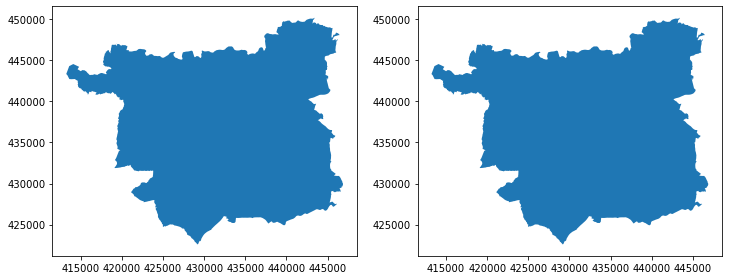

The area of Leeds County Unitary Authority is  551706537.384094  sq km whilst the area of Leeds LA is  551706537.384094 sq km


In [47]:
f,ax = plt.subplots(1,2, figsize=(12,6))

leeds_counties_unitary.plot(ax=ax[0],categorical = True, column = 'CTYUA20NM')
leeds_la.plot(ax=ax[1], categorical = True, column = 'LAD20NM')

plt.show()
print('The area of Leeds County Unitary Authority is ',leeds_counties_unitary.iloc[0]['Shape__Are'],' sq km', 'whilst the area of Leeds LA is ',leeds_la.iloc[0]['Shape__Are'],'sq km')

Looks like they both cover the same area.

Let's have another look without a fill and over a basemap.

NameError: name 'none' is not defined

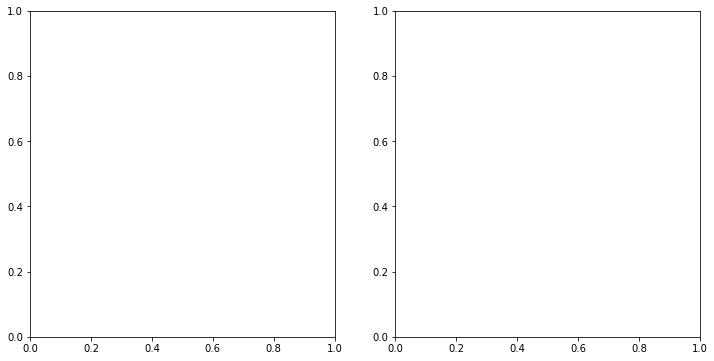

In [48]:
f,ax = plt.subplots(1,2, figsize=(12,6))

leeds_counties_unitary.plot(ax=ax[0],categorical = True, column = 'CTYUA20NM')
leeds_la.plot(ax=ax[1], categorical = True, column = 'LAD20NM')

plt.show()